 ### ЛАБОРАТОРНАЯ РАБОТА 2 
***********
#            ЧИСЛЕННОЕ РЕШЕНИЕ ЗАДАЧИ КОШИ

In [137]:
import numpy as np
import copy
import math
import matplotlib.pyplot as plt
from scipy. integrate import odeint

### Входные данные по варианту 20

In [138]:
y = -2
t0 = 0 # отрезок [t0;T]
T = 2

def f(t,y):
    return -30*y + 5*np.sin(2*t)**2


h = (T - t0)/10   # шаг разбиения
print("шаг разбиения = ", h)


шаг разбиения =  0.2


In [139]:
x = np.arange(t0,T+h, h)
print(x)
print(f(x,y))

[0.  0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2. ]
[60.         60.75823323 62.57299881 64.34348429 64.99573694 64.13410905
 62.28125254 60.5610853  60.0170377  60.97912171 62.86375008]


### 1)  Методом Эйлера с постоянным шагом найти  решение задачи Коши.  Построить график решения.

### Mетод Эйлера

In [140]:
def Euler_max(y0,h,f,a0,b0): 
    n =  math.ceil((b0-a0)/h)
    y_list = []
    t = a0
    y = y0
    y_list.append(y)
    for i in range(1,n+1): 
        y = y + h*(f(t,y))
        t = t + h
        y_list.append(y)
    return y_list

In [141]:
h = (T - t0)/10
n = math.ceil((T-t0)/h)
y_ans_Eul_2h = Euler_max(y,h,f,t0,T) 
print("Решение задачи Коши с шагом = ", h)
print(y_ans_Eul_2h)

Решение задачи Коши с шагом =  0.2
[-2, 10.0, -49.84835335467358, 249.75636653451858, -1247.9131358148225, 6240.5648264620095, -31201.997310499617, 156010.4428030064, -780052.1017979712, 3900260.5123973973, -19501302.366162647]


[0.  0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2. ]
[-2, 10.0, -49.84835335467358, 249.75636653451858, -1247.9131358148225, 6240.5648264620095, -31201.997310499617, 156010.4428030064, -780052.1017979712, 3900260.5123973973, -19501302.366162647]


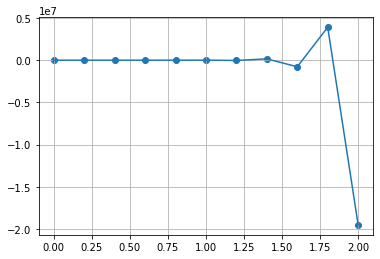

In [142]:
# Построить график решения.

x = np.arange(t0,T+h, h)
print(x)
print(y_ans_Eul_2h)
x_graph = np.linspace(t0, T, 1, endpoint = True) 
plt.plot(x, y_ans_Eul_2h)
plt.scatter(x, y_ans_Eul_2h)
plt.grid('True')
plt.show()

### 2) Составить  программу вычисления  решения  методом Эйлера с заданной точностью, используя правило Рунге. Найти решение задачи с точностью  10^-8, число точек N и шаг, при котором точность достигается.    Построить график решения.

In [143]:
# правило Рунге
def runge (I, I0, p):
    return  abs ( (I - I0)/(pow(2,p)-1) )

In [144]:
h = 0.2
eps = 10**(-3)
m = 1000

while (m > eps):
    n = math.ceil((T-t0)/h)
    y_ans_Eul_2h = Euler_max(y,h,f,t0,T) 
    h=h/2
    y_ans_Eul_h = Euler_max(y,h,f,t0,T) 
    q = []
    for i in range(0,n):
        q.append(runge(y_ans_Eul_h[2*i],y_ans_Eul_2h[i],1) )
    m = max(q)

print("Шаг при погрешности по Рунге",eps," = ",h)
print("Число точек",math.ceil((T-t0)/h))

Шаг при погрешности по Рунге 0.001  =  4.8828125e-05
Число точек 40960


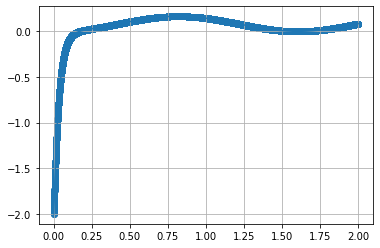

In [145]:
x = np.arange(t0,T+h, h)
x_graph = np.linspace(t0, T, 1, endpoint = True) 
plt.plot(x, y_ans_Eul_h)
plt.scatter(x, y_ans_Eul_h)
plt.grid('True')
plt.show()

### 3) Составить  программу вычисления  решения с  заданной точностью методом индивидуального варианта. Найти решение задачи с заданной точностью,   число точек N  и шаг, при котором точность достигается. Построить график решения задачи.

In [148]:
#Интерполяционный метод Адамса 3-го порядка
def Adams(y0,h,f1,a0,b0): 
    n0 =  math.ceil((b0-a0)/h)
    t1 = np.arange(a0,b0+h, h)
    # находим первые точки с помощью точного решения 
    g = np.linspace(a0, b0, n0) 
    y_tochn = odeint(f1, y0, g) 
    y_list = []
    y = y0
    y_list.append(y0)
    y_list.append(y_tochn[1][0])
    y_list.append(y_tochn[2][0])
    
    for i in range(2,n0-1):
        # прогноз
        y = y + h/12*(23*f1(t1[i],y_list[i]) - 16*f1(t1[i-1],y_list[i-1]) + 5*f1(t1[i-2],y_list[i-2]))
        f = f1(t1[i+1],y)
        # коррекция
        y = y_list[i] + h/12*(5*f + 8*f1(t1[i],y_list[i]) - f1(t1[i-1],y_list[i-1]))
        y_list.append(y)
    return y_list

In [149]:
h = 0.2
eps = 10**(-2)
m = 1000

while (m > eps):  
    n = math.ceil((T-t0)/h)
    A1 = Adams(y,h,f,t0,T) 
    h=h/2
    A2 = Adams(y,h,f,t0,T) 
    q = []
    n = math.ceil(len(A2)/2)
    for i in range(n):
        q.append(runge( A2[2*i],A1[i],3) )
    m = max(q)

print("Шаг при погрешности по Рунге ",eps," = ",h)
print("Число точек",math.ceil((T-t0)/h))

Шаг при погрешности по Рунге  0.01  =  0.000390625
Число точек 5120


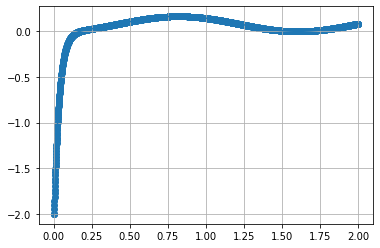

In [150]:
x = np.arange(t0,T, h*2)
x_graph = np.linspace(t0, T, 1, endpoint = True) 
plt.plot(x, A1)
plt.scatter(x, A1)
plt.grid('True')
plt.show()

## Задача 2.2

### 1) Составить программу,   вычисляющую решение задачи по  методу из индивидуального варианта  с точностью  10^-8. Отладить ее  на тестовом примере  из расчетного задания 22.

###  ОТЛАДКА

In [151]:
t = math.exp(1) 
y = 2*pow((math.exp(1)),2)
a = t
b = t + 1.2

h = 0.001
def f1(t,y):
    return y/t*np.log(t) + 2*t*np.log(t)

# нужные две стартовые точки / первая есть
y0 = y
# найдем из точного решения
def tochn(t0):
    return np.log(t0)*( t0**2 + math.exp(2))



In [152]:
h = 0.2
eps = 10**(-3)
m = 1000

while (m > eps):
    # первые три точки
    n = math.ceil((b-a)/h)
    ad1 = Adams(y,h,f1,a,b)
    h=h/2
    ad2 = Adams(y,h,f1,a,b)
    n = math.ceil(len(ad2)/2)
    q = []
    for i in range(n):
        q.append(runge(ad2[2*i], ad1[i],3) )
    m = max(q)

print("Шаг при погрешности по Рунге ",eps," = ",h)
print("Число точек",math.ceil((b-a)/h))

Шаг при погрешности по Рунге  0.001  =  2.44140625e-05
Число точек 49152


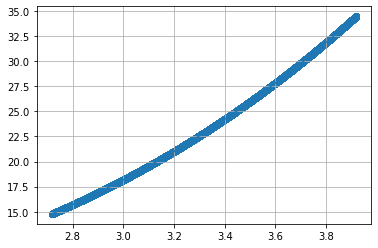

In [153]:
x =  np.arange(a,b, h)
x_graph = np.linspace(a , b, 1, endpoint = True) 
plt.plot(x, ad2)
plt.scatter(x, ad2)
plt.grid('True')
plt.show()

### ИНД. ЗАДАНИЕ

In [154]:
y0 = -2
t0 = 0 # отрезок [t0;T]
T = 2
h = 0.002

def f(t,y):
    return -30*y + 5*np.sin(2*t)**2

In [155]:
h = 0.2
eps = 10**(-3)
m = 1000

while (m > eps):
    n = math.ceil((b-a)/h)
    ad1 = Adams(y0,h,f,t0,T)
    h=h/2
    ad2 = Adams(y0,h,f,t0,T)
    n = math.ceil(len(ad2)/2)
    q = []
    for i in range(n):
        q.append(runge(ad2[2*i], ad1[i],3) )
    m = max(q)

print("Шаг при погрешности по Рунге ",eps," = ",h)
print("Число точек",math.ceil((T-t0)/h))

Шаг при погрешности по Рунге  0.001  =  4.8828125e-05
Число точек 40960


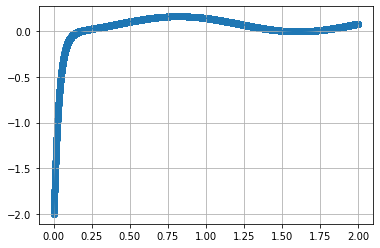

In [156]:
ad1 = Adams(y0,h,f,t0,T)
x =  np.arange(t0,T, h)
x_graph = np.linspace(a , b, 1, endpoint = True) 
plt.plot(x, ad1)
plt.scatter(x, ad1)
plt.grid('True')
plt.show()

### 2) Найти  приближенные  решения задач (2.1) и (2.2).

In [238]:
def Y(t,y):
    return 0.003*(380-y)*(y-230)

def Z(t,z):
    return 0.003*(380-z)*(z-230)-4*np.sin(40/2)

h = 2

## для Y

In [239]:
def Y(t,y):
    return 0.002*(130-y)*(y-90)

a=0
b=40
h=0.1
y0 = 110
m=1000
eps = 10**(-3)

while (m>eps):
    n = math.ceil((b-a)/h)
    ad1 = Adams(y0,h,Y,a,b)
    h=h/2
    ad2 = Adams(y0,h,Y,a,b)
    n = math.ceil(len(ad2)/2)
    q = []
    for i in range(n):
        q.append(runge(ad2[2*i], ad1[i],3) )
    m = max(q)

print("Шаг при погрешности по Рунге ",eps," = ",h)
print("Число точек",math.ceil((b-a)/h)+1)

Шаг при погрешности по Рунге  0.001  =  9.765625e-05
Число точек 409601


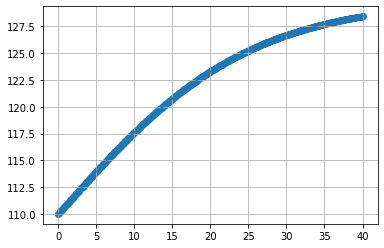

In [253]:
# пострения с Эйлером
t0=0
T=40
h=0.1
y = 110

y_ans_Eul_h = Euler_max(y,h,Y,t0,T) 
x = np.arange(t0,T+h, h)

plt.plot(x, y_ans_Eul_h)
plt.scatter(x, y_ans_Eul_h)
plt.grid('True')
plt.show()

## для Z

In [256]:
def Z(t,z):
    return 0.002*(130-z)*(z-90)-3*np.sin(t/2)
a=0
b=40
h1=0.1
y0 = 110
eps = 10**(-3)
m=1000

while (m>eps):
    n = math.ceil((b-a)/h1)
    ad2 = Adams(y0,h1,Z,a,b)
    h1=h1/2
    ad21 = Adams(y0,h1,Z,a,b)
    n = math.ceil(len(ad2)/2)
    q = []
    for i in range(n):
        q.append(runge(ad21[2*i], ad2[i],3) )
    m = max(q)


print("Шаг при погрешности по Рунге ",eps," = ",h1)
print("Число точек",math.ceil((b-a)/h1)+1)

Шаг при погрешности по Рунге  0.001  =  9.765625e-05
Число точек 409601


### 3) Построить графики полученных  решений y и z

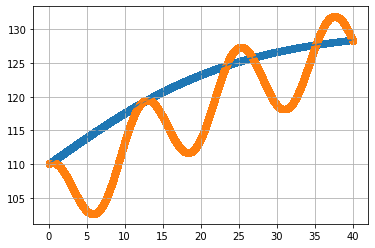

In [266]:
ad1 = Adams(y0,h1,Y,a,b)
x1 =  np.arange(a,b, h)

ad11 = Adams(y0,h1,Z,a,b)
x2 =  np.arange(a,b, h1)

plt.plot(x2, ad1)
plt.scatter(x2, ad1)

plt.plot(x2, ad11)
plt.scatter(x2, ad11)
plt.grid('True')
plt.show()

### 4) Вычислить приближенно  площади между полученными кривыми  на отрезке [0,T] по квадратурной формуле индивидуального варианта ЛР 1.

In [259]:
# функция по индивидуальному варианту ( формула трапеции )
def trapezium(h0, y0, a0, b0):
    I = 0
    for i in range(0, math.ceil((b0-a0)/h0) - 1):  # округление числа в большую сторону
        I += (y0[i] + y0[i+1])/2
        #print(i, " - ", I)
    I*=h0
    return I    

In [267]:
print("Площадь y = ",trapezium(h, ad1, a, b))
print("Площадь z = ",trapezium(h1, ad11, a, b))
print("Площадь, заключенная между интегральными кривыми = ",abs(trapezium(h, ad11, a, b)-trapezium(h1, ad1, a, b)))

Площадь y =  4389.433761475053
Площадь z =  4706.18982421587
Площадь, заключенная между интегральными кривыми =  483.8396811123821


In [271]:
ad1 = np.array(ad1)
ad11 = np.array(ad11)
print(len(ad1))

difference = np.abs(ad1 - ad11)

import scipy. optimize as opt 
from scipy import interpolate as inter 

dif = inter.interp1d(np.arange(a, b, (b-a)/len(ad1)), difference, kind = "cubic")

def find_segments(f, A, B, eps):
    res = []
    t = A
    while(t < B):
        if (np.abs(f(t)) < eps):
            res. append(t)
            t+= 1
        else:
            t += eps
    res.append(B) 
    return res

seg = find_segments(dif, a, b-h, 1e-3)
print("Точки пересечения = ",seg)

409600
Точки пересечения =  [0, 12.204999999998675, 23.355000000006115, 26.778000000009076, 35.122000000006956, 39.9]


In [274]:
max_area = []
for i in range(0,len(seg)-1):
    max_area.append(abs(trapezium(h, ad11,seg[i] , seg[i + 1])-trapezium(h1, ad1, seg[i] , seg[i + 1])))
    print("Площадь, заключенная между интегральными кривыми = ",abs(trapezium(h, ad11,seg[i] , seg[i + 1])-trapezium(h1, ad1, seg[i] , seg[i + 1])))

Площадь, заключенная между интегральными кривыми =  57.844802152873626
Площадь, заключенная между интегральными кривыми =  53.611119832634586
Площадь, заключенная между интегральными кривыми =  7.189556287767118
Площадь, заключенная между интегральными кривыми =  32.14952523221655
Площадь, заключенная между интегральными кривыми =  17.636788092564643


In [276]:
print("Наибольшая площадь = ",max(max_area))

Наибольшая площадь =  57.844802152873626
